In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df=pd.read_csv('loan.csv')

C:\Users\smriti.jain.VAIBHAVGLOBAL\AppData\Local\Temp\ipykernel_18104\2065032070.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loan.csv')


In [4]:
#Top 5 rows
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN



# Step1:- Clean dataset

In [5]:
#1. Check how many columns have 80% of nan values
(df.isna().sum()/df.shape[0])*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [6]:
#Check columns which have nan value greater than 80%
df.iloc[:,np.array(np.where(((df.isna().sum()/df.shape[0])*100)>=0.8))[0]]

,emp_title,emp_length,desc,mths_since_last_delinq,mths_since_last_record,next_pymnt_d,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,...,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,NaN,10+ years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,AIR RESOURCES BOARD,10+ years,Borrower added on 12/21/11 > to pay for prop...,35.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,University Medical Group,1 year,Borrower added on 12/21/11 > I plan on combi...,38.0,NaN,Jun-16,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,FiSite Research,4 years,Our current gutter system on our home is old a...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,"Squarewave Solutions, Ltd.",3 years,The rate of interest and fees incurred by carr...,5.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,NaN,< 1 year,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,NaN,< 1 year,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here after testing on multiple threshold, finally set a value 

In [7]:
#Select those columns which has na value less than 30%
df1=df.iloc[:,np.array(np.where(((df.isna().sum()/df.shape[0])*100)<=0.3))[0]]

In [8]:
#check na value %
(df1.isna().sum()/df1.shape[0])*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                 

In [9]:
df1.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


In [10]:
#Drop remaining NA values from dataset
df2=df1.dropna(axis=0)

In [11]:
#Check how many nan values we have
df2.isna().sum()/df2.shape[0]

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc     

In [12]:
#Drop duplicate rows
df2.drop_duplicates(inplace=True)

C:\Users\smriti.jain.VAIBHAVGLOBAL\AppData\Local\Temp\ipykernel_18104\3873540347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


# 2. Filter Columns based on the values

In [12]:
df2['home_ownership'].value_counts()

RENT        18793
MORTGAGE    17602
OWN          3039
OTHER          96
NONE            1
Name: home_ownership, dtype: int64

In [13]:
df2['term'].value_counts()

 36 months    28934
 60 months    10597
Name: term, dtype: int64

In [14]:
df2['application_type'].value_counts()

INDIVIDUAL    39531
Name: application_type, dtype: int64

In [15]:
df2['term'].value_counts()

 36 months    28934
 60 months    10597
Name: term, dtype: int64

In [16]:
df2['home_ownership'].value_counts()

RENT        18793
MORTGAGE    17602
OWN          3039
OTHER          96
NONE            1
Name: home_ownership, dtype: int64

In [17]:
df2['acc_now_delinq'].value_counts()

0    39531
Name: acc_now_delinq, dtype: int64

In [18]:
df2['tax_liens'].value_counts()

0.0    39531
Name: tax_liens, dtype: int64

In [19]:
df2['loan_status'].value_counts()

Fully Paid     32856
Charged Off     5535
Current         1140
Name: loan_status, dtype: int64

In [13]:
#Select only those columns which can be useful.Check columns values by their description in data_dic and the values

filter_col=['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','home_ownership','verification_status','purpose','open_acc','total_acc','total_pymnt','loan_status']

In [14]:
#These filter columns are based on the description of selected columns  

df2_A=df2[filter_col]
df2_A.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,purpose,open_acc,total_acc,total_pymnt,loan_status
0,5000,5000,4975.0,36 months,10.65%,162.87,B,RENT,Verified,credit_card,3,9,5863.155187,Fully Paid
1,2500,2500,2500.0,60 months,15.27%,59.83,C,RENT,Source Verified,car,3,4,1008.710000,Charged Off
2,2400,2400,2400.0,36 months,15.96%,84.33,C,RENT,Not Verified,small_business,2,10,3005.666844,Fully Paid
3,10000,10000,10000.0,36 months,13.49%,339.31,C,RENT,Source Verified,other,10,37,12231.890000,Fully Paid
4,3000,3000,3000.0,60 months,12.69%,67.79,B,RENT,Source Verified,other,15,38,3513.330000,Current


In [22]:
df2_A['loan_status'].value_counts() 

Fully Paid     32856
Charged Off     5535
Current         1140
Name: loan_status, dtype: int64

# Univariate Analysis 

In [22]:
df2_A.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,purpose,open_acc,total_acc,total_pymnt,loan_status
0,5000,5000,4975.0,36 months,10.65%,162.87,B,RENT,Verified,credit_card,3,9,5863.155187,Fully Paid


In [23]:
import warnings
warnings.filterwarnings(action='ignore')

Analyse the data based on the different categories

<AxesSubplot:xlabel='loan_status', ylabel='count'>

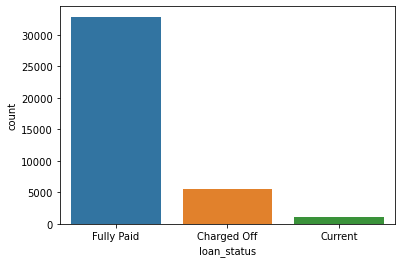

In [24]:
#Count the loan status values
sns.countplot(df2_A['loan_status'])

In [25]:
#Check the statistics values of dataframe
df2_A.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,open_acc,total_acc,total_pymnt
count,39531.000000,39531.000000,39531.000000,39531.000000,39531.000000,39531.000000,39531.000000
mean,11240.396145,10967.609598,10425.339261,325.094419,9.303180,22.118236,12192.059016
std,7456.279941,7186.580728,7125.180571,208.864216,4.398783,11.396188,9039.801943
min,500.000000,500.000000,0.000000,15.690000,2.000000,2.000000,33.730000
25%,5500.000000,5437.500000,5000.000000,167.340000,6.000000,14.000000,5599.817900
50%,10000.000000,9750.000000,8999.448728,280.970000,9.000000,20.000000,9954.720000
75%,15000.000000,15000.000000,14400.000000,431.370000,12.000000,29.000000,16576.679990
max,35000.000000,35000.000000,35000.000000,1305.190000,44.000000,90.000000,58563.679930


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

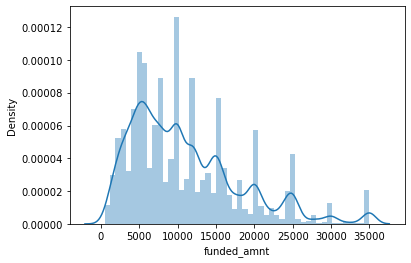

In [25]:
#Lets understand the distribution of funded amount in complete dataset
sns.distplot(df2_A['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

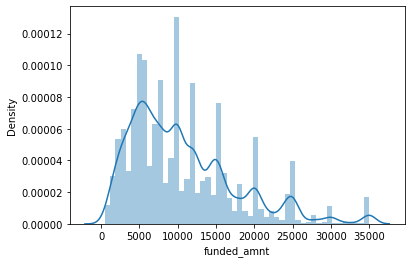

In [26]:
#Check the funded_amnt distribution among the data in Fully_Paid
sns.distplot(df2_A[df2_A['loan_status']=='Fully Paid']['funded_amnt'])

<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

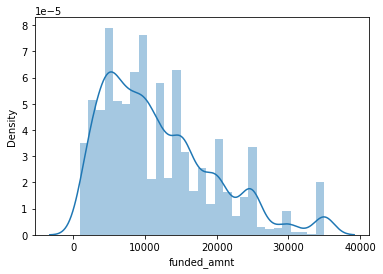

In [27]:
#Now Check the funded_amnt distribution among the data in CHarged Off

sns.distplot(df2_A[df2_A['loan_status']=='Charged Off']['funded_amnt'])

In [ ]:
#2. Now see next column in 3 graph :- 1. complete dataset,2. Fully Paid , 3.Charged Off

<AxesSubplot:xlabel='term', ylabel='count'>

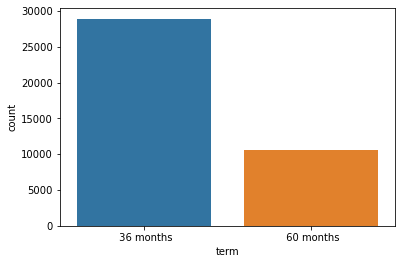

In [28]:
sns.countplot(df2_A['term'])

<AxesSubplot:xlabel='term', ylabel='count'>

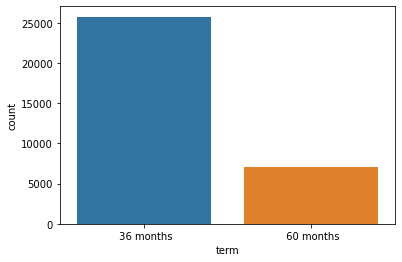

In [29]:
sns.countplot(df2_A[df2_A['loan_status']=='Fully Paid']['term'])

<AxesSubplot:xlabel='term', ylabel='count'>

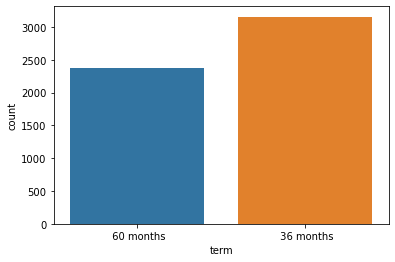

In [30]:
sns.countplot(df2_A[df2_A['loan_status']=='Charged Off']['term'])

In [31]:
#Remove % and change the datatype string to float
df2_A['int_rate']=df2_A['int_rate'].apply(lambda x:x.replace('%','')).astype(float)

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

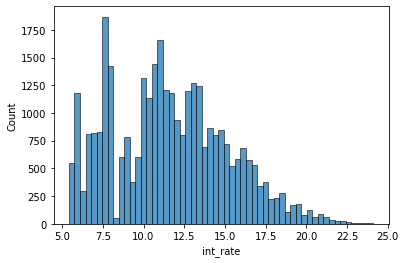

In [32]:
sns.histplot(df2_A[df2_A['loan_status']=='Fully Paid']['int_rate'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

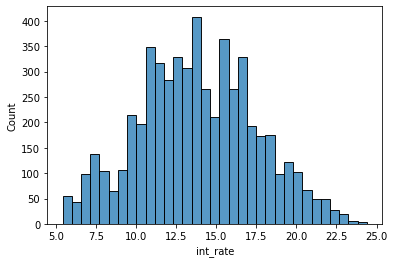

In [33]:
sns.histplot(df2_A[df2_A['loan_status']=='Charged Off']['int_rate'])

<AxesSubplot:xlabel='grade', ylabel='count'>

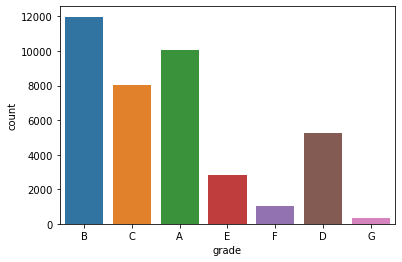

In [34]:
sns.countplot(df2_A['grade'])

<AxesSubplot:xlabel='grade', ylabel='count'>

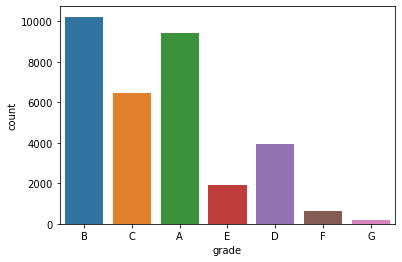

In [35]:
sns.countplot(df2_A[df2_A['loan_status']=='Fully Paid']['grade'])

<AxesSubplot:xlabel='grade', ylabel='count'>

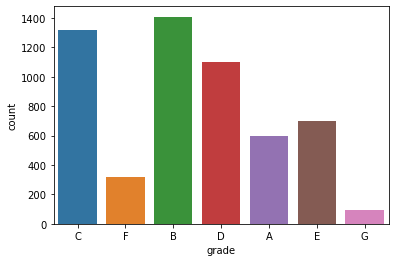

In [36]:
sns.countplot(df2_A[df2_A['loan_status']=='Charged Off']['grade'])

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

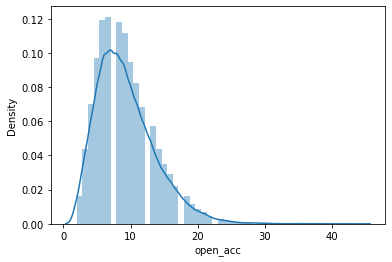

In [84]:
#Lets Analysis data first for who have pay the loan 
sns.distplot(df2_A[df2_A['loan_status']=='Fully Paid']['open_acc'])

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

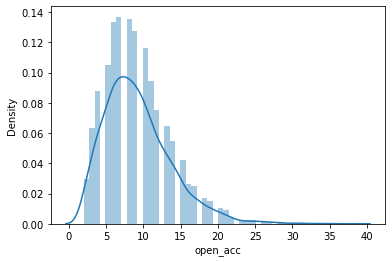

In [85]:
sns.distplot(df2_A[df2_A['loan_status']=='Charged Off']['open_acc'])

In [ ]:
#Remove % and change the datatype string to float
df2_A['int_rate']=df2_A['int_rate'].apply(lambda x:x.replace('%','')).astype(float)

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

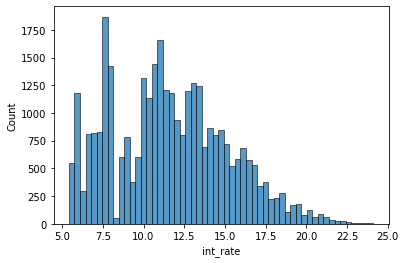

In [86]:
sns.histplot(df2_A[df2_A['loan_status']=='Fully Paid']['int_rate'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

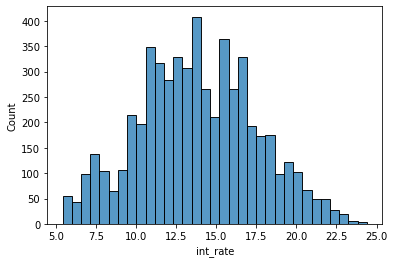

In [87]:
sns.histplot(df2_A[df2_A['loan_status']=='Charged Off']['int_rate'])

<AxesSubplot:xlabel='term', ylabel='count'>

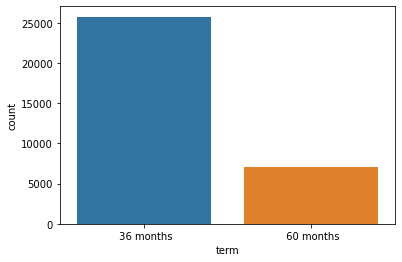

In [61]:
sns.countplot(df2_A[df2_A['loan_status']=='Fully Paid']['term'])

<AxesSubplot:xlabel='term', ylabel='count'>

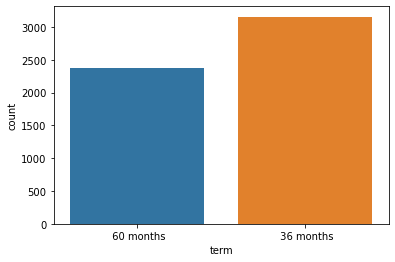

In [62]:
sns.countplot(df2_A[df2_A['loan_status']=='Charged Off']['term'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

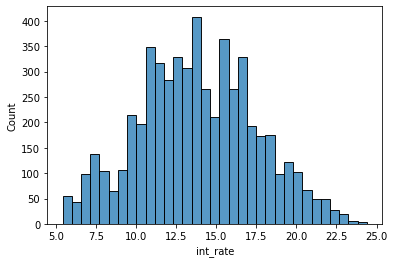

In [75]:
sns.histplot(df2_A[df2_A['loan_status']=='Charged Off']['int_rate'])

# Bivariate Analysis

In [15]:
df2_A.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,purpose,open_acc,total_acc,total_pymnt,loan_status
0,5000,5000,4975.0,36 months,10.65%,162.87,B,RENT,Verified,credit_card,3,9,5863.155187,Fully Paid


In [66]:
df2_A.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

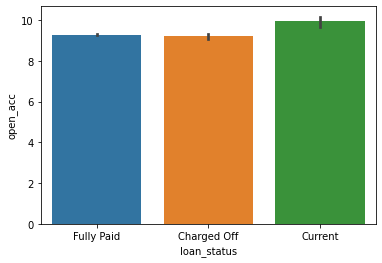

In [42]:
sns.barplot(x='loan_status',y='open_acc',data=df2_A)

In [ ]:
df2_A.replace(to_replace=['A','B','C','D','E','F','G'],value=[1,2,3,4,5,6,7],inplace=True)

In [ ]:
sns.boxplot(x='grade',y='funded_amnt',data=df2_A,palette='rainbow')

In [ ]:
#Replace Categorical values with numeric values.
df2_A.replace(to_replace=['Fully Paid', 'Charged Off', 'Current'],value=[1,2,3],inplace=True)

<AxesSubplot:xlabel='loan_status', ylabel='funded_amnt'>

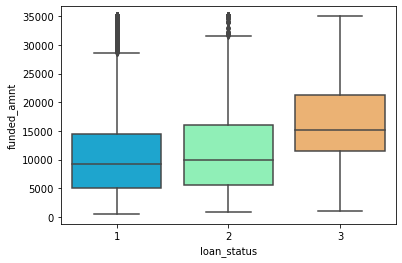

In [71]:
sns.boxplot(x='loan_status',y='funded_amnt',data=df2_A,palette='rainbow')

In [ ]:
#This dataset is imbalance; It's difficult to analyse the data based on this dataframe.

In [ ]:
#conclusion
#1.Term attributes :- fully paid dataset has gap of between 2 terms 36 and 60 is large; where in chargedoff dataset gap is small.
#2.Grade attributes:- In terms of fully paid and chargedoff there is a difference in grades.
#3.Home_Ownership:- There is no major difference in home_ownership in both categories.
#4.Verification_Status:- There is no major difference in Verification_Status in both categories.